<h1 style="text-align: center;"><strong>Tareas Cortas - Bloque 1</strong></h1>


<ul>
<li><strong>Curso:</strong> CE5201: Procesamiento y An&aacute;lisis de Im&aacute;genes Digitales</li>
<li><strong>Estudiante:</strong> Luis Felipe Vargas Jimenez</li>
<li><strong>Carnet:</strong> 2020211831<br /><br /></li>

</ul>

<p><strong>Pregunta 2:</strong> Enunciado...</p>

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


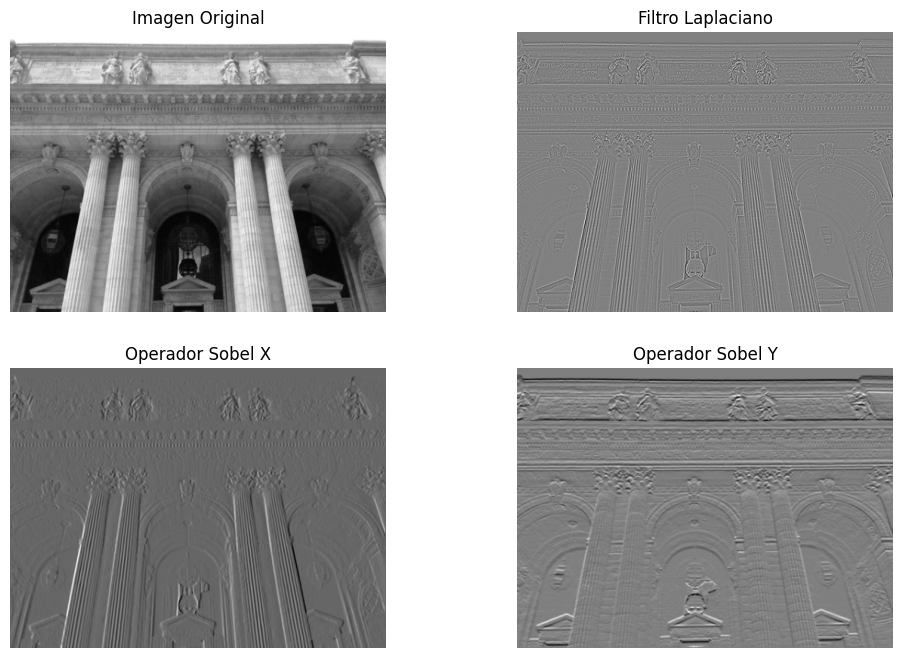

In [8]:


def apply_filters(image):
    # Aplicar filtros y operadores
    filters = {
        'Filtro Laplaciano': cv2.Laplacian(image, cv2.CV_64F),
        'Operador Sobel X': cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3),
        'Operador Sobel Y': cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    }
    return filters

# Leer la imagen en escala de grises
img = cv2.imread('columnas.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar que la imagen fue leída correctamente
if img is None:
    raise ValueError("Error al cargar la imagen. Verifica la ruta o el formato.")

# Aplicar los filtros
filters = apply_filters(img)

# Mostrar las imágenes
plt.figure(figsize=(12, 8))

# Mostrar la imagen original
plt.subplot(2, 2, 1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Mostrar los resultados de los filtros
for i, (title, filtered_image) in enumerate(filters.items(), 2):
    plt.subplot(2, 2, i)
    plt.title(title)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

plt.show()


<p><strong>Pregunta 3:</strong> Enunciado...</p>

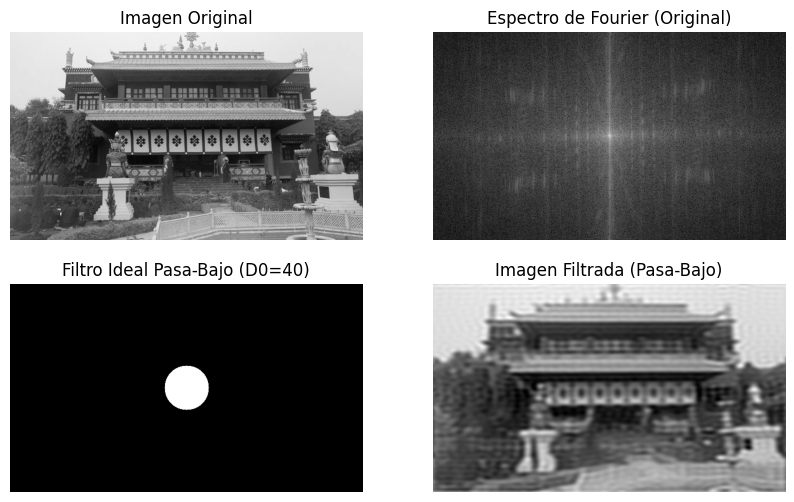

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para crear un filtro pasa-bajo ideal
def crear_filtro_ideal_pasabajo(dim_filtro, frecuencia_corte):
    filas, columnas = dim_filtro
    centro_fila, centro_columna = filas // 2, columnas // 2
    
    # Crear una malla de coordenadas (grid)
    Y, X = np.ogrid[:filas, :columnas]
    
    # Calcular la distancia desde el centro de la malla
    distancia = np.sqrt((X - centro_columna)**2 + (Y - centro_fila)**2)
    
    # Crear la máscara del filtro (1 dentro del radio de corte, 0 fuera de él)
    filtro = np.zeros((filas, columnas), dtype=np.float32)
    filtro[distancia <= frecuencia_corte] = 1
    
    return filtro

# Función para aplicar la Transformada de Fourier y filtrar en el dominio de la frecuencia
def aplicar_filtro_frecuencia(imagen, filtro):
    # Realizar la Transformada de Fourier 2D
    dft_imagen = np.fft.fft2(imagen)
    
    # Centrar las bajas frecuencias en la imagen transformada
    dft_centrada = np.fft.fftshift(dft_imagen)
    
    # Aplicar el filtro multiplicándolo con la imagen en el dominio de la frecuencia
    dft_filtrada = dft_centrada * filtro
    
    # Descentrar las bajas frecuencias antes de aplicar la inversa
    dft_final = np.fft.ifftshift(dft_filtrada)
    
    # Realizar la Transformada Inversa de Fourier para volver al dominio espacial
    imagen_filtrada = np.fft.ifft2(dft_final)
    
    # Tomar solo la parte real de la imagen reconstruida
    return np.abs(imagen_filtrada)

# Cargar la imagen en escala de grises
ruta_imagen = 'edificio.jpg'
imagen_original = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if imagen_original is None:
    raise ValueError(f"No se pudo cargar la imagen en la ruta: {ruta_imagen}")

# Normalizar la imagen para que sus valores estén entre [0, 1]
imagen_normalizada = imagen_original / 255.0

# Definir la frecuencia de corte para el filtro pasa-bajo
frecuencia_corte = 40

# Crear el filtro pasa-bajo ideal
filtro_pasabajo = crear_filtro_ideal_pasabajo(imagen_normalizada.shape, frecuencia_corte)

# Aplicar el filtro en el dominio de la frecuencia
imagen_filtrada = aplicar_filtro_frecuencia(imagen_normalizada, filtro_pasabajo)

# Mostrar los resultados
plt.figure(figsize=(10, 6))

# Imagen original
plt.subplot(2, 2, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Espectro de la Transformada de Fourier original
dft_original = np.fft.fftshift(np.fft.fft2(imagen_normalizada))
plt.subplot(2, 2, 2)
plt.imshow(np.log(1 + np.abs(dft_original)), cmap='gray')
plt.title('Espectro de Fourier (Original)')
plt.axis('off')

# Filtro pasa-bajo ideal
plt.subplot(2, 2, 3)
plt.imshow(filtro_pasabajo, cmap='gray')
plt.title(f'Filtro Ideal Pasa-Bajo (D0={frecuencia_corte})')
plt.axis('off')

# Imagen filtrada
plt.subplot(2, 2, 4)
plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada (Pasa-Bajo)')
plt.axis('off')

plt.show()


<p><strong>Pregunta 4:</strong> Enunciado...</p>

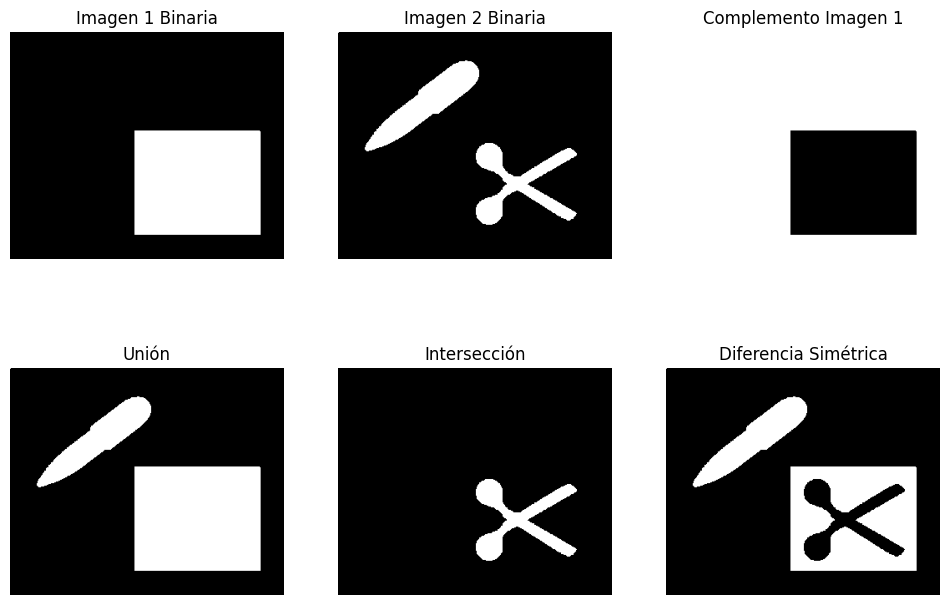

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer y convertir las imágenes a binario
img1 = cv2.imread('imagen2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('imagen3.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_img1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, binary_img2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

# Operaciones morfológicas
complemento_img1 = cv2.bitwise_not(binary_img1)
union = cv2.bitwise_or(binary_img1, binary_img2)
interseccion = cv2.bitwise_and(binary_img1, binary_img2)
diferencia_simetrica = cv2.bitwise_xor(binary_img1, binary_img2)

# Mostrar los resultados
imagenes = [binary_img1, binary_img2, complemento_img1, union, interseccion, diferencia_simetrica]
titulos = ['Imagen 1 Binaria', 'Imagen 2 Binaria', 'Complemento Imagen 1', 'Unión', 'Intersección', 'Diferencia Simétrica']

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.title(titulos[i])
    plt.imshow(imagenes[i], cmap='gray')
    plt.axis('off')
plt.show()
